In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic_data=pd.read_csv('train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.shape

(891, 12)

In [8]:
titanic_data.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ryerson, Miss. Susan Parker ""Suzette""",male,1601,G6,S
freq,1,577,7,4,644


In [9]:
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
null_age=titanic_data.Age.isna()
null_age.sum()

177

In [11]:
null_cabin=titanic_data.Cabin.isna().sum()
null_cabin


687

In [12]:
null_Embarked=titanic_data.Embarked.isna().sum()
null_Embarked

2

In [13]:
print("mean of Age attribute:",titanic_data.Age.mean())

mean of Age attribute: 29.69911764705882


In [14]:
print("Median of Age attribute:",titanic_data.Age.median())

Median of Age attribute: 28.0


In [15]:
print("standard deviation of Age attribute:",titanic_data.Age.std())

standard deviation of Age attribute: 14.526497332334044


In [16]:
print("description of Age attribute:",titanic_data.Age.describe())

description of Age attribute: count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [17]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
import matplotlib.pyplot as plt

In [19]:
titanic_data.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


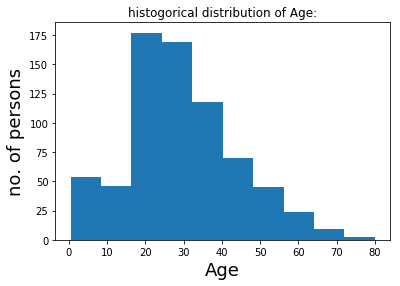

In [20]:
plt.hist(titanic_data.Age)
font={'size':18}
plt.xlabel('Age',fontdict=font)
plt.ylabel('no. of persons',fontdict=font)
plt.title('histogorical distribution of Age:')
plt.show()

In [21]:
age_cut_bin=pd.cut(titanic_data.Age,bins=[0,10,20,30,40,50,60,70,80])
sorted_age_group=age_cut_bin.value_counts().sort_index(ascending=True)
sorted_age_group
                                                

(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Age, dtype: int64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'age')

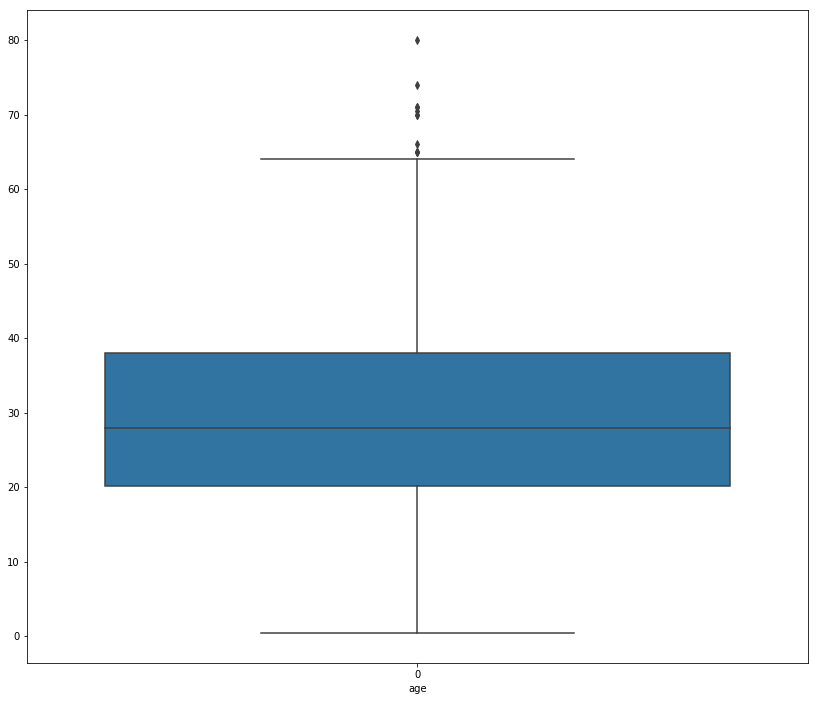

In [23]:
fig, ax=plt.subplots(figsize=(14,12))
sns.boxplot(data=titanic_data.Age,ax=ax)
plt.xlabel('age')


In [24]:
titanic_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
total_sex_count=titanic_data.Sex.count()
total_sex_count

891

In [26]:
female_count=(titanic_data['Sex'][titanic_data['Sex']=='female'].count()/total_sex_count)*100
female_count

35.24130190796858

In [27]:
male_count=(titanic_data['Sex'][titanic_data.Sex=='male'].count()/total_sex_count)*100
male_count

64.75869809203144

<BarContainer object of 2 artists>

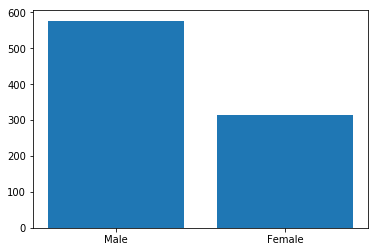

In [28]:
plt.bar(x=['Male','Female'],height=titanic_data.Sex.value_counts())

In [29]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


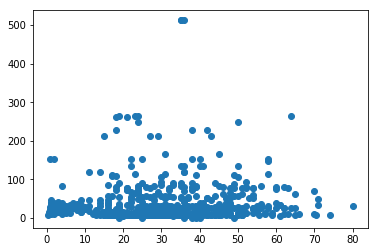

In [30]:
plt.scatter(titanic_data.Age,titanic_data.Fare)

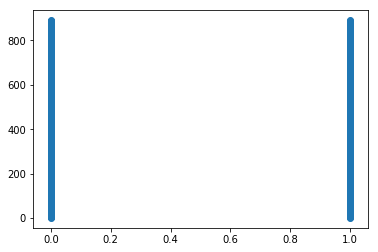

In [31]:
plt.scatter(titanic_data.Survived,titanic_data.PassengerId)

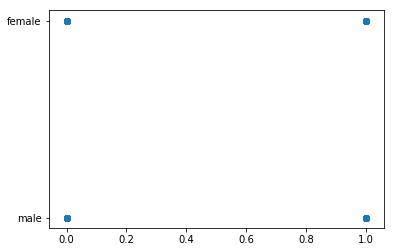

In [32]:
plt.scatter(titanic_data.Survived,titanic_data.Sex)

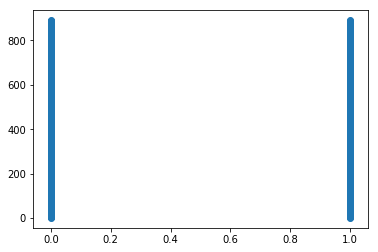

In [33]:
plt.scatter(titanic_data.Survived,titanic_data.PassengerId)

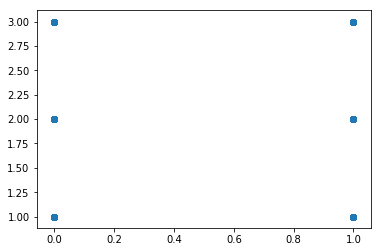

In [34]:
plt.scatter(titanic_data.Survived,titanic_data.Pclass)

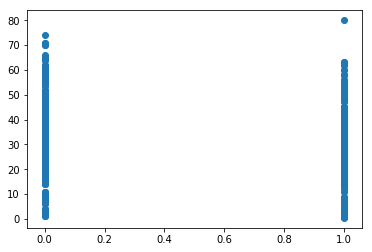

In [35]:
plt.scatter(titanic_data.Survived,titanic_data.Age)

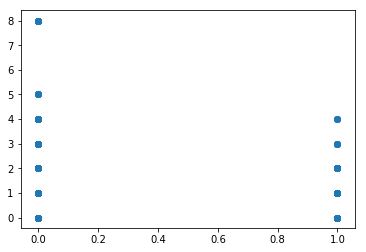

In [36]:
plt.scatter(titanic_data.Survived,titanic_data.SibSp)

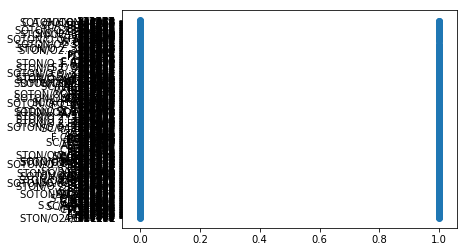

In [37]:
plt.scatter(titanic_data.Survived,titanic_data.Ticket)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

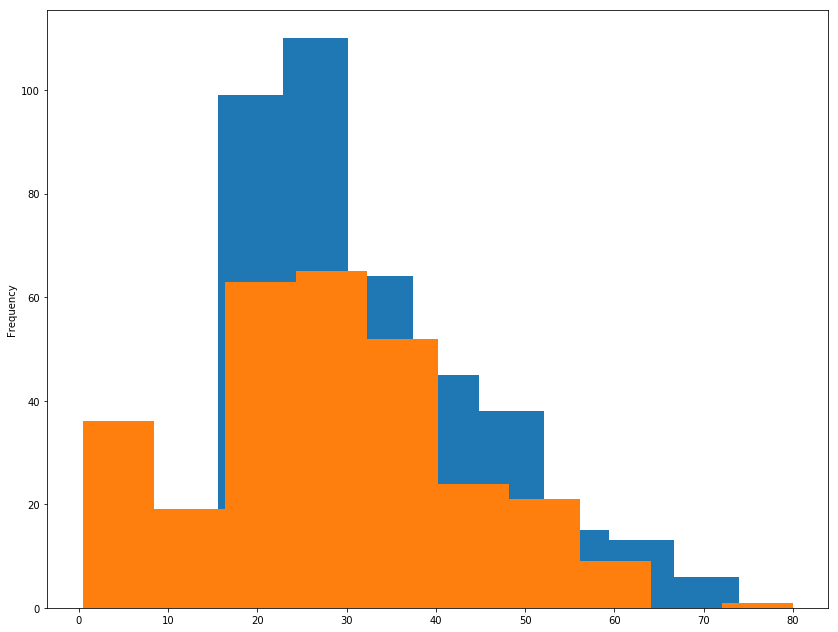

In [38]:
plt.figure(figsize=(14,11))
titanic_data.groupby('Survived')['Age'].plot.hist()

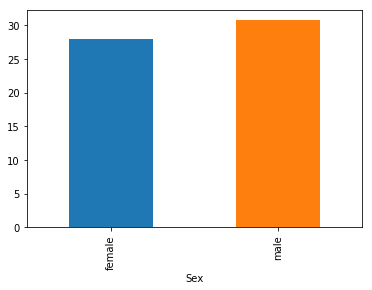

In [39]:
titanic_data.groupby('Sex')['Age'].mean().plot.bar()

In [40]:
pd.crosstab(titanic_data.Sex,titanic_data.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


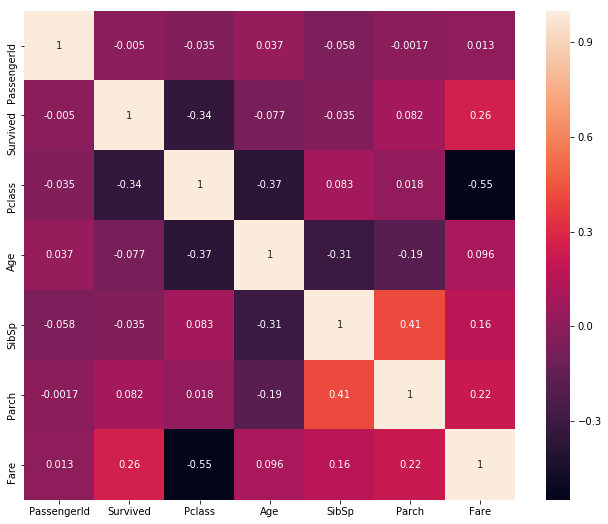

In [41]:
plt.figure(figsize=(11,9))
sns.heatmap(titanic_data.corr(),annot=True)

Fare
0.0000      AxesSubplot(0.125,0.125;0.775x0.755)
4.0125      AxesSubplot(0.125,0.125;0.775x0.755)
5.0000      AxesSubplot(0.125,0.125;0.775x0.755)
6.2375      AxesSubplot(0.125,0.125;0.775x0.755)
6.4375      AxesSubplot(0.125,0.125;0.775x0.755)
6.4500      AxesSubplot(0.125,0.125;0.775x0.755)
6.4958      AxesSubplot(0.125,0.125;0.775x0.755)
6.7500      AxesSubplot(0.125,0.125;0.775x0.755)
6.8583      AxesSubplot(0.125,0.125;0.775x0.755)
6.9500      AxesSubplot(0.125,0.125;0.775x0.755)
6.9750      AxesSubplot(0.125,0.125;0.775x0.755)
7.0458      AxesSubplot(0.125,0.125;0.775x0.755)
7.0500      AxesSubplot(0.125,0.125;0.775x0.755)
7.0542      AxesSubplot(0.125,0.125;0.775x0.755)
7.1250      AxesSubplot(0.125,0.125;0.775x0.755)
7.1417      AxesSubplot(0.125,0.125;0.775x0.755)
7.2250      AxesSubplot(0.125,0.125;0.775x0.755)
7.2292      AxesSubplot(0.125,0.125;0.775x0.755)
7.2500      AxesSubplot(0.125,0.125;0.775x0.755)
7.3125      AxesSubplot(0.125,0.125;0.775x0.755)
7.4958      Axe

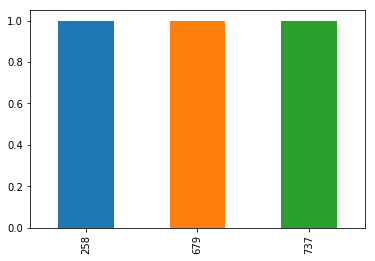

In [42]:
titanic_data.groupby('Fare')['Survived'].plot.bar()

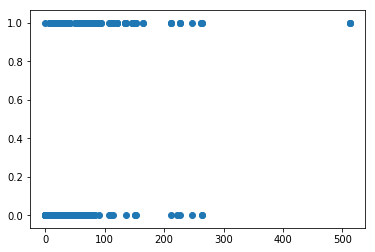

In [43]:
plt.scatter(titanic_data.Fare,titanic_data.Survived)

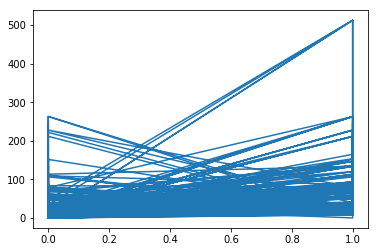

In [44]:
plt.plot(titanic_data.Survived,titanic_data.Fare)

In [45]:
import pandas as pd
import numpy as np

In [46]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
missing_values=titanic_data.dropna()

In [48]:
missing_values.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [49]:
filling_age_values=titanic_data

In [50]:
filling_age_values.Age=filling_age_values.Age.fillna(titanic_data.Age.mean())
filling_age_values.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

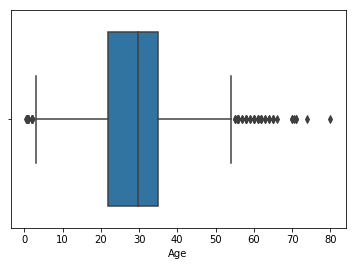

In [51]:
plt.xlabel('Age')
sns.boxplot(titanic_data.Age)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

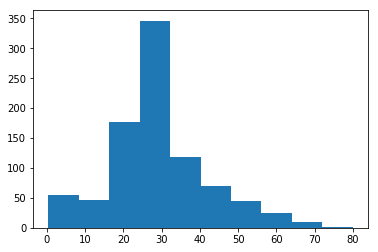

In [52]:
plt.hist(titanic_data.Age)

In [53]:
bins_values=[0,10,20,30,40,50,60,70]
label_groups=['children','teen','adolescence','adult','married','parents','senior citizens']
age_groups=pd.cut(titanic_data.Age,bins=bins_values,labels=label_groups)
sorting_age=age_groups.sort_index(ascending=True)
sorting_age.head()

0    adolescence
1          adult
2    adolescence
3          adult
4          adult
Name: Age, dtype: category
Categories (7, object): [children < teen < adolescence < adult < married < parents < senior citizens]

In [54]:
sorting_age.value_counts()

adolescence        407
adult              155
teen               115
married             86
children            64
parents             42
senior citizens     17
Name: Age, dtype: int64

In [55]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
training_data=titanic_data[['Age','Fare','PassengerId','SibSp']]

In [57]:
training_data.head()

,Age,Fare,PassengerId,SibSp
0,22.0,7.2500,1,1
1,38.0,71.2833,2,1
2,26.0,7.9250,3,0
3,35.0,53.1000,4,1
4,35.0,8.0500,5,0


In [58]:
training_data.isnull().sum()

Age            0
Fare           0
PassengerId    0
SibSp          0
dtype: int64

In [59]:
output_data=titanic_data.Survived

In [60]:
output_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x,x_test,y,y_test=train_test_split(training_data,output_data,test_size=0.4,random_state=22)

In [63]:
logistic_model.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
training_predictions=logistic_model.predict(x_test)
training_predictions[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [65]:
from sklearn.metrics import mean_absolute_error

In [66]:
error_found=mean_absolute_error(training_predictions,y_test)

In [67]:
error_found

0.30532212885154064

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
accuracy_found=accuracy_score(training_predictions,y_test)
accuracy_found

0.6946778711484594

In [70]:
single_predictions=logistic_model.predict([[7,54,0,0]])
single_predictions

array([1], dtype=int64)

### test model

In [71]:
test_data=pd.read_csv('test.csv')

In [75]:
test_data.head()

,Age,Fare,PassengerId,SibSp
0,34.5,7.8292,892,0
1,47.0,7.0000,893,1
2,62.0,9.6875,894,0
3,27.0,8.6625,895,0
4,22.0,12.2875,896,1


In [74]:
test_data=test_data[['Age','Fare','PassengerId','SibSp']]
test_data.head()

,Age,Fare,PassengerId,SibSp
0,34.5,7.8292,892,0
1,47.0,7.0000,893,1
2,62.0,9.6875,894,0
3,27.0,8.6625,895,0
4,22.0,12.2875,896,1


In [76]:
from sklearn.preprocessing import Imputer

In [77]:
test_data_imputed=test_data

In [80]:
imputer=Imputer(strategy='most_frequent')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [81]:
imputer.fit(test_data_imputed)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

In [82]:
imputer.statistics_

array([ 21.  ,   7.75, 892.  ,   0.  ])

In [83]:
test_data_predictions=imputer.transform(test_data_imputed

In [84]:
test_data_predictions

array([[3.45000e+01, 7.82920e+00, 8.92000e+02, 0.00000e+00],
       [4.70000e+01, 7.00000e+00, 8.93000e+02, 1.00000e+00],
       [6.20000e+01, 9.68750e+00, 8.94000e+02, 0.00000e+00],
       ...,
       [3.85000e+01, 7.25000e+00, 1.30700e+03, 0.00000e+00],
       [2.10000e+01, 8.05000e+00, 1.30800e+03, 0.00000e+00],
       [2.10000e+01, 2.23583e+01, 1.30900e+03, 1.00000e+00]])

In [85]:
test_data_imputed=pd.DataFrame(test_data_predictions,columns=test_data.columns)

In [87]:
test_data_imputed.head()

,Age,Fare,PassengerId,SibSp
0,34.5,7.8292,892.0,0.0
1,47.0,7.0000,893.0,1.0
2,62.0,9.6875,894.0,0.0
3,27.0,8.6625,895.0,0.0
4,22.0,12.2875,896.0,1.0


In [88]:
test_predictions=logistic_model.predict(test_data_imputed)

In [90]:
test_predictions[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [92]:
submission=pd.DataFrame({'PassengerID':test_data['PassengerId'],'survived':test_predictions})
submission.head()

,PassengerID,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [93]:
submission.to_csv('submission-logistic.csv')